In [1]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from dataProcessing import load_data 


# Define paths
data = '../Data/raw_analyst_ratings/*.csv ' 
# extracted_folder_path = '../Data'  

In [2]:
import pandas as pd

# Load the dataset into the DataFrame
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [3]:
# explore the the first 5 rows
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# Check the size of the dataset
df.shape

(1407328, 6)

In [5]:
# checking missing values
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [6]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,Unnamed: 0,headline,url,publisher,date,stock


In [7]:
# drop duplicated rows
df.drop_duplicates().reset_index(inplace=True)

In [8]:
# import eda
import descriptiveAnalysis as da

# Descriptive statistics
print("Headline Length Statistics:")
print(da.headline_length_stats(df))

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


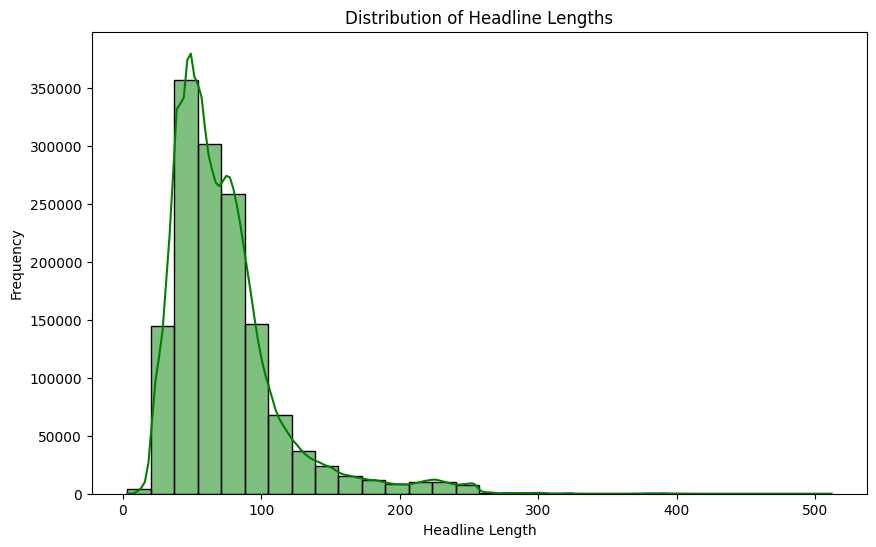

In [10]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    df['headline_length'], 
    bins=30, 
    kde=True, 
    color='green',  # Color for the histogram
    line_kws={'color': 'red'}  # Color for the KDE line
)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Top Publishers:")
publisher_counts = da.articles_per_publisher(df).reset_index(name="number_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,number_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


In [12]:
print(top_publisher.columns)

Index(['publisher', 'number_of_articles'], dtype='object')


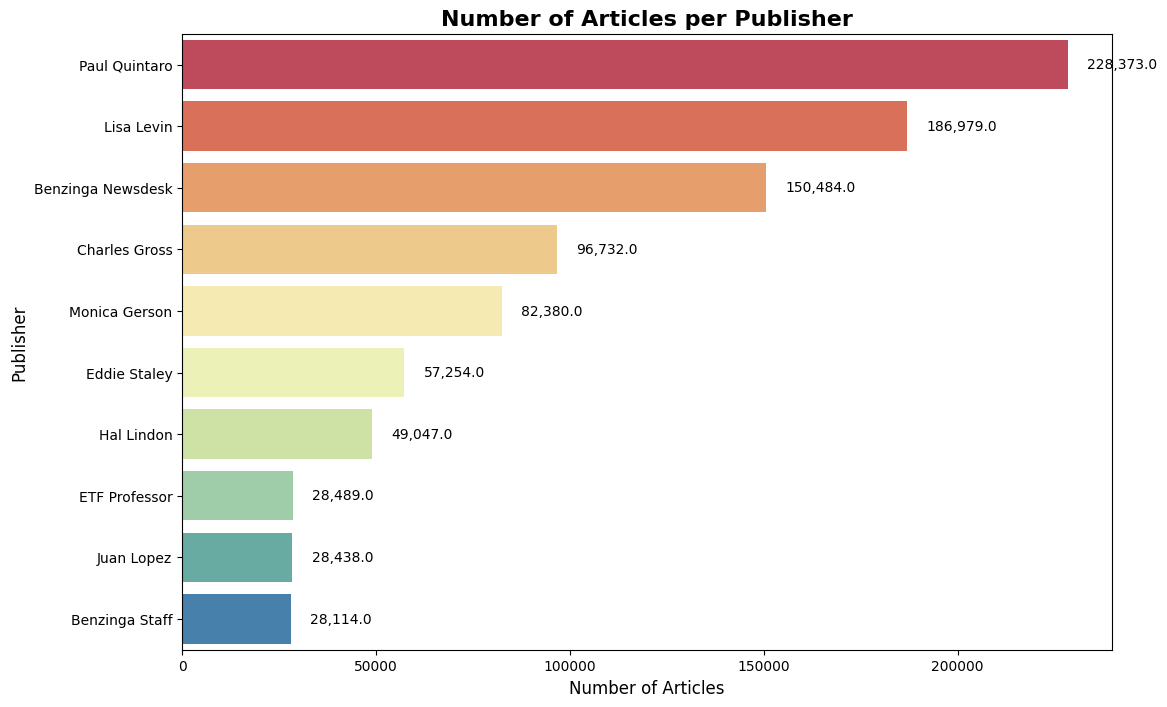

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with distinct colors for each publisher
custom_palette = sns.color_palette("Spectral", n_colors=len(top_publisher))

# Plot the number of articles per publisher
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='number_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette=custom_palette,  # Use the custom palette
                   hue='publisher',  # Assign the 'publisher' variable to hue
                   legend=False,     # Disable the legend
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()  # Get the bar width (number of articles)
    label = f'{width:,}'  # Format the number with commas
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,  # Add the label
            ha='left', va='center', color='black', fontsize=10)

# Set titles and labels
plt.title('Number of Articles per Publisher', fontsize=16, fontweight='bold')
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

# Display the plot
plt.show()

In [14]:
import pandas as pd

# Assuming df is your DataFrame
print("Original 'date' column:")
print(df['date'].head())

# Convert the 'date' column to datetime format with error handling
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for null values
if df['date'].isnull().sum() > 0:
    print("There are null values in the 'date' column after conversion.")

# Verify conversion
print("Converted 'date' column:")
print(df['date'].head())

# Now call the function if no null values
articles_by_day = da.articles_by_day_of_week(df).reset_index(name='number_of_articles')
print(articles_by_day)

Original 'date' column:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
There are null values in the 'date' column after conversion.
Converted 'date' column:
0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]
  day_of_week  number_of_articles
0    Thursday               12688
1   Wednesday               11891
2     Tuesday               11002
3      Monday               10322
4      Friday                9381
5      Sunday                 436
6    Saturday                 267


In [15]:
# identify unique emails
unique_domains = da.identify_unique_domains(df)
unique_domains.reset_index(drop=True)

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


In [16]:
# Import the module
from sentimentAnalysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\surap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# make the date as index and add stock column at the end
sentiment_df['Date'] = df['date'].dt.date
sentiment_df['stock'] = df['stock']
sentiment_df.set_index('Date', inplace=True)

In [18]:

# Display results
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [19]:
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")   

Number of empty headlines: 0


In [20]:
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")

Number of missing headlines after sentiment analysis: 0


In [21]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())

headline
<class 'str'>    1407328
Name: count, dtype: int64


In [22]:
# Drop rows where the 'headline' column has float values
sentiment_df = sentiment_df[sentiment_df['headline'].apply(lambda x: not isinstance(x, float))]

In [23]:
# Save the sentiment analysis result into csv for correlation analysis
# with stock market movements
sentiment_df.to_csv('../Data/sentiment.csv')

Sentiment
Neutral     741194
Positive    441858
Negative    224276
Name: count, dtype: int64


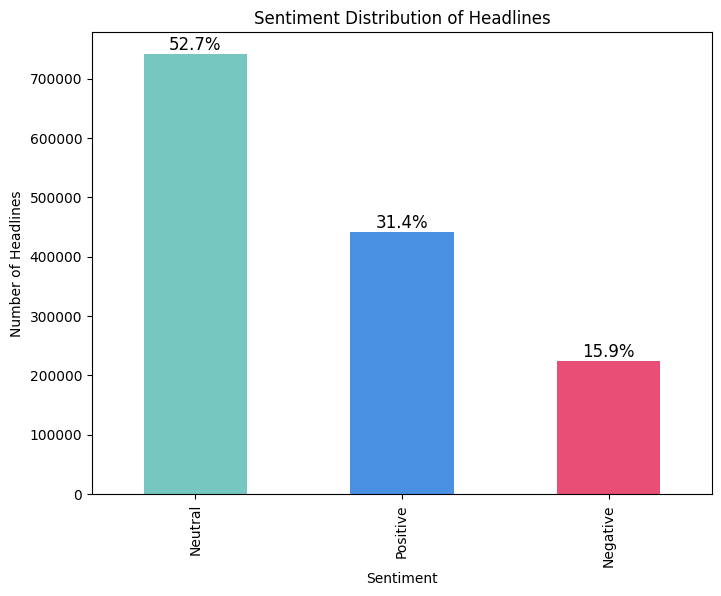

In [24]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Define custom colors for each sentiment
colors = ['#76c7c0', '#4a90e2', '#e94e77']  # Custom colors for Neutral, Positive, Negative

# Plot the bar chart with custom colors
bars = sentiment_distribution.plot(kind='bar', color=colors)

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages.iloc[i]:.1f}%'  # Use .iloc to avoid FutureWarning
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()

In [25]:
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [26]:
sentiment_df.dtypes

headline      object
neg          float64
neu          float64
pos          float64
compound     float64
Sentiment     object
stock         object
dtype: object